In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from tabs import TorsionInfoList, GetTorsionProfilesFromMDTraj
import mdtraj as md

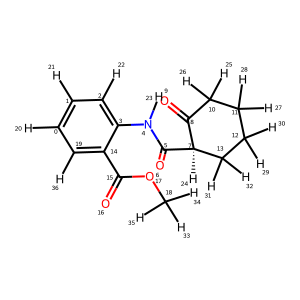

In [2]:
mol = Chem.AddHs(Chem.MolFromSmiles("[H]c1c([H])c([H])c(N([H])C(=O)[C@@]2([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c(C(=O)OC([H])([H])[H])c1[H]"))
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
mol

In [3]:
torInfo = TorsionInfoList.WithTorsionLibs(mol)

In [4]:
torInfo.smarts

['[O:1]=[C:2]!@;-[O:3]~[C:4]',
 '[$(C=O):1][NX3:2]!@;-[!#1:3][!#1:4]',
 '[O:1]=[CX3:2]!@;-[NX3H1:3][!#1:4]',
 '[C:1][CX4:2]!@;-[CX3:3]=[O:4]',
 '[$([cH0]!@;-[*^2]):1][c:2]([cH1])!@[CX3:3]=[O:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]']

In [5]:
torInfo.indices

[[16, 15, 17, 18],
 [5, 4, 3, 2],
 [6, 5, 4, 3],
 [8, 7, 5, 6],
 [3, 14, 15, 16],
 [7, 8, 10, 11],
 [10, 8, 7, 13],
 [8, 7, 13, 12],
 [8, 10, 11, 12],
 [7, 13, 12, 11],
 [10, 11, 12, 13]]

In [6]:
torInfo.multiplicities

[1, 4, 1, 3, 2, 3, 3, 6, 6, 3, 3]

In [7]:
torInfo.bounds

[array([3.14159265]),
 array([0.78539816, 2.35619449, 3.92699082, 5.49778714]),
 array([3.14159265]),
 array([1.04719755, 3.14159265, 5.21853446]),
 array([1.57079633, 4.71238898]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902])]

In [8]:
torInfo.torsionTypes

[<TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>]

In [9]:
customProfiles = GetTorsionProfilesFromMDTraj(md.load("../Data/CustomTABS/conformational_ensemble_smiles_id_0_openff200_CO_0_161311_output_stripped.h5"), torInfo.indices)
customProfiles.shape

/localhome/braunje/.conda/envs/tabs/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


(250000, 11)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from tabs import fits

In [12]:
binsize = np.pi*2/36
yHists, yHistsCount, xHist = fits.ComputeTorsionHistograms(customProfiles,binsize)

In [13]:
xHist[2]

0.4363323129985824

In [14]:
coeffs, peaks = fits.ComputeGaussianFit(xHist,yHists[4],yHistsCount[4],binsize)

peaksInitial [1, 16, 20]
peakPairs [(1, 16), (16, 20), (20, 1)]
binEdges [9, 17, 26]
binIndices {9, 10, 11, 12, 13, 14, 15, 16}
binIndices set by 1
binIndices {17, 18, 19, 20, 21, 22, 23, 24, 25}
binIndices set by 1
6.1086523819801535 {32, 33, 34, 35, 0, 1, 2, 3, 4, 5, 6, 7, 8, 27, 28, 29, 30, 31} 6.283185307179586 0.13930851305508177 0.5100470292254589
2.792526803190927 {9, 10, 11, 12, 13, 14, 15, 16} 2.879793265790643 0.06029166432432185 0.20498138078600356
3.490658503988659 {17, 18, 19, 20, 21, 22, 23, 24, 25} 3.577924966588375 0.06149241518702818 0.262873036406022
center 6.283185307179586
center 2.879793265790643
center 3.577924966588375


In [15]:
# test = list({0, 1, 2, 3, 4, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35})
test = list({13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25})
values = np.take(xHist,test)
weights = np.take(yHists[4],test)
np.sum(values*weights)/np.sum(weights)

3.2067639220299893

In [16]:
values

array([2.35619449, 2.53072742, 2.70526034, 2.87979327, 3.05432619,
       3.22885912, 3.40339204, 3.57792497, 3.75245789, 3.92699082,
       4.10152374, 4.27605667, 4.45058959])

In [17]:
xHist[17]

3.0543261909900763

In [18]:
weights

array([0.07056548, 0.15465277, 0.20731905, 0.20498138, 0.18573   ,
       0.19906846, 0.24176527, 0.26287304, 0.20397298, 0.09570687,
       0.02901458, 0.0057525 , 0.0016272 ])

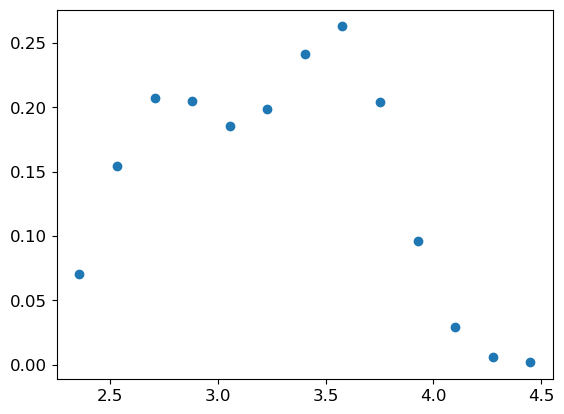

In [19]:
plt.scatter(values, weights)

In [20]:
a = 0.5
b = 6.1

In [21]:
np.pi - np.abs(np.abs(a-b) - np.pi)

0.6831853071795866

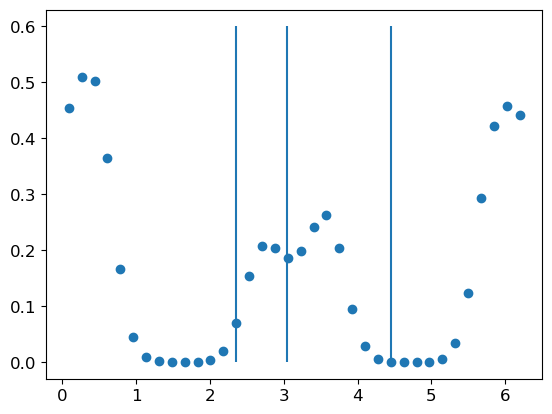

In [22]:
plt.scatter(xHist, yHists[4])
plt.vlines(x=2.35, ymin=0, ymax=0.6)
plt.vlines(x=4.45, ymin=0, ymax=0.6)
plt.vlines(x=3.05, ymin=0, ymax=0.6)

In [23]:
weights

array([0.07056548, 0.15465277, 0.20731905, 0.20498138, 0.18573   ,
       0.19906846, 0.24176527, 0.26287304, 0.20397298, 0.09570687,
       0.02901458, 0.0057525 , 0.0016272 ])

In [24]:
np.max(weights)

0.262873036406022

In [25]:
coeffs

array([[0.5126769 , 6.28318531, 0.76429542],
       [0.20817545, 2.87979327, 0.45942575],
       [0.25287304, 3.57792497, 0.34174171]])

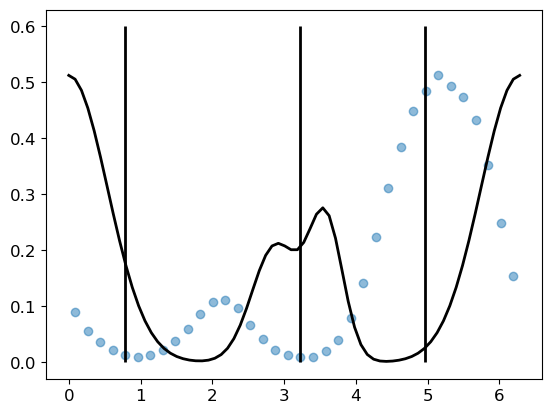

In [26]:
plt.scatter(xHist, yHists[3], alpha=0.5)
xfit = np.linspace(0, 2*np.pi, 72)
# yfit = fits.FitFunc.GAUSS.call(coeffsDjahan, xfit)
yfit2 = fits.FitFunc.GAUSS.call(coeffs, xfit)
# plt.plot(xfit, yfit, 'r-', lw=2)
plt.plot(xfit, yfit2, 'k-', lw=2)
#plt.vlines(xHist[5], 0, 0.6, colors='k', lw=2)
#plt.vlines(xHist[18], 0, 0.6, colors='k', lw=2)
plt.vlines(0.78, 0, 0.6, colors='k', lw=2)
plt.vlines(3.22, 0, 0.6, colors='k', lw=2)
plt.vlines(4.96, 0, 0.6, colors='k', lw=2)

id: 0
peaksInitial [35]
peakPairs [(35, 35)]
binEdges [17]
6.1086523819801535 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35} 6.283185307179586 0.250442408087495 1.4077802209482395
center 6.283185307179586
border 35
id: 1
peaksInitial [3, 32]
peakPairs [(3, 32), (32, 3)]
binEdges [18, 35]
binIndices {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 35}
binIndices set by 2
binIndices {32, 33, 34, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
binIndices set by 1
0.5235987755982988 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 35} 0.6108652381980152 0.2516231956945782 0.6611245406455541
5.585053606381854 {32, 33, 34, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31} 5.67232006898157 0.09732838707494977 0.5313381408925207
center 0.6108652381980152
center 5.67232006898157
id: 2
peaksInitial [0]
peakPairs [(0, 0)]
binEdges [18]
6.1086523819801535 {0, 1, 2, 3, 4

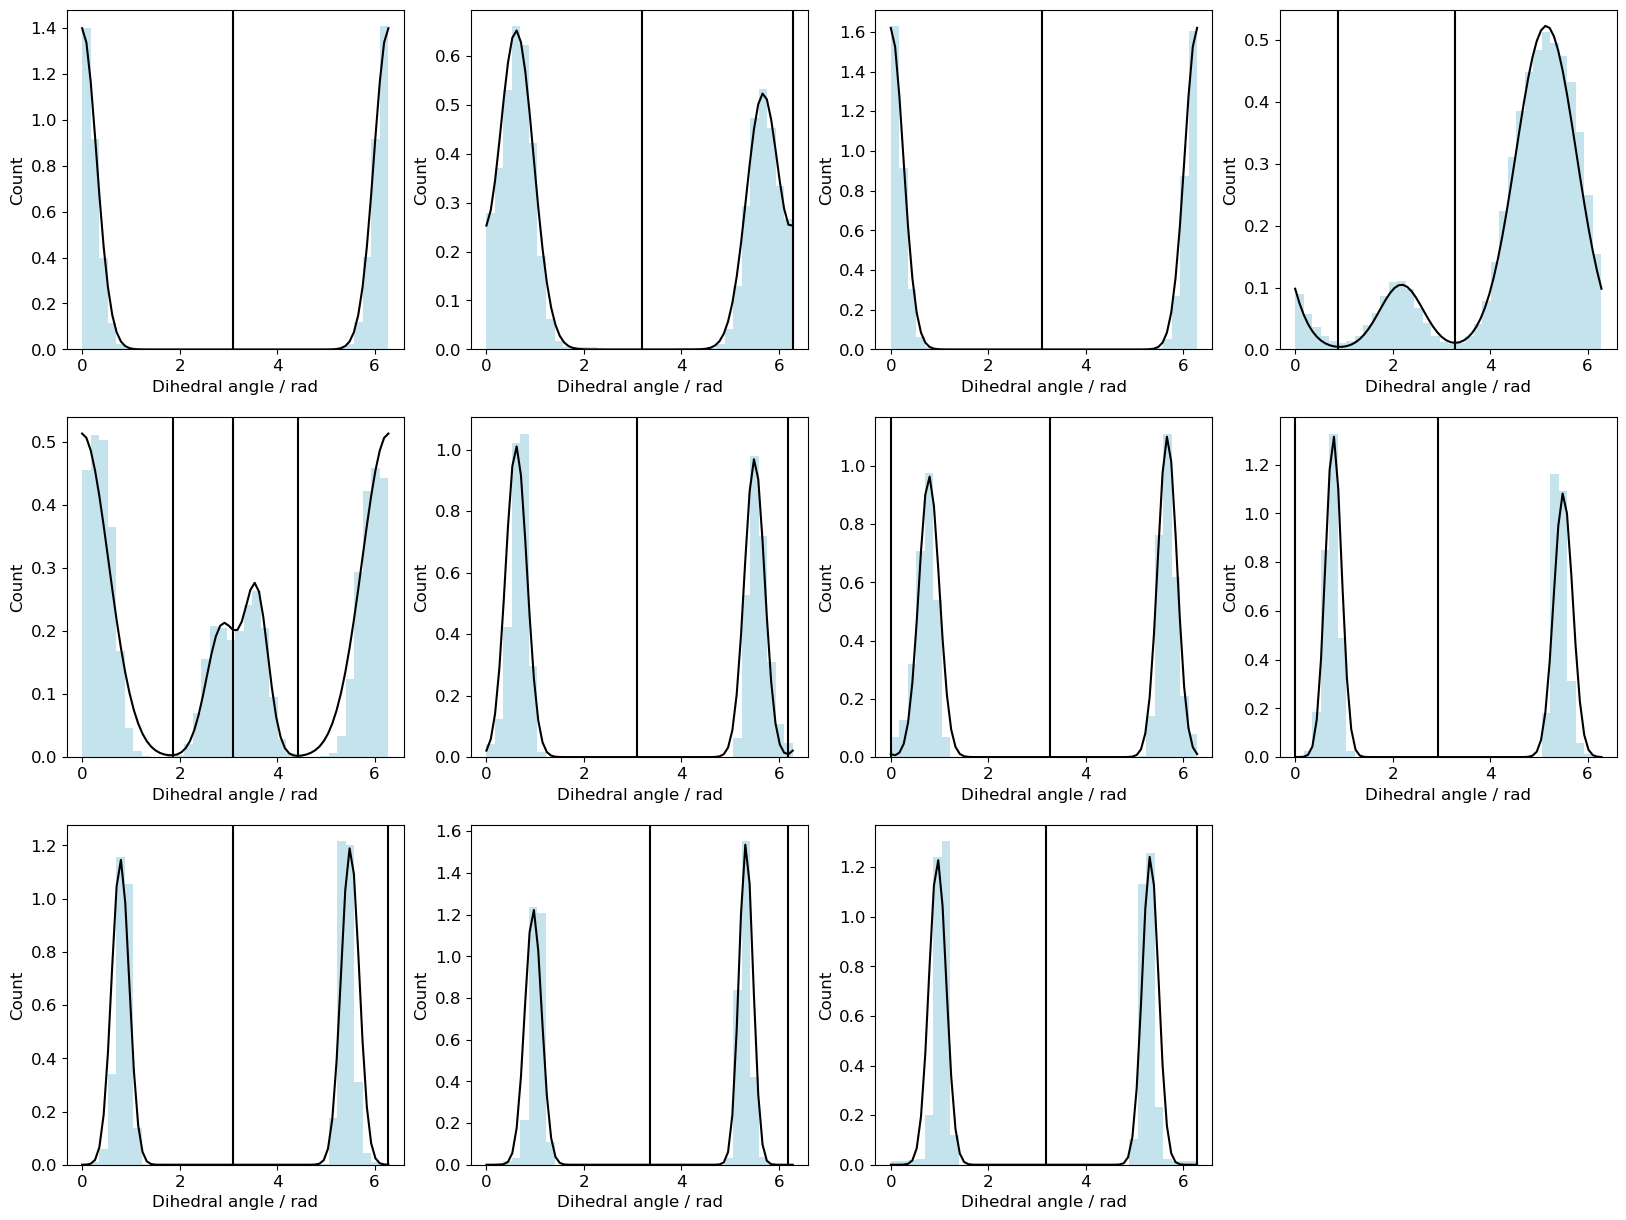

In [27]:
torInfo2 = TorsionInfoList.WithCustomTorsions(mol, torInfo.indices, customProfiles, showFits=True, excludePeaks=1e-4, prominence=1e-4)